In [1]:
import pandas as pd

In [111]:
dataframe = pd.read_csv("./daily-total-female-births-CA.csv",header=0)

In [112]:
df2 = pd.read_csv("./daily-total-female-births-CA.csv",header=0,parse_dates=[0])

In [113]:
series = pd.read_csv("./daily-total-female-births-CA.csv",header=0,parse_dates=[0],index_col=0,squeeze=True)

In [114]:
from matplotlib import pyplot as plt

In [115]:
dataviz_df = df2.copy()

In [116]:
dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<AxesSubplot:>

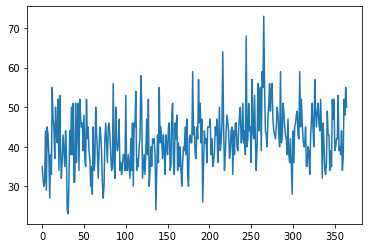

In [117]:
dataviz_df["births"].plot()

In [118]:
dataviz_df.index = dataviz_df['date']

<AxesSubplot:xlabel='date'>

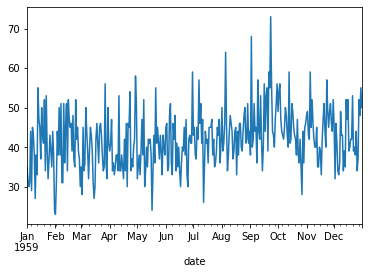

In [119]:
dataviz_df["births"].plot()

In [120]:
dataviz_df2 = dataviz_df[(dataviz_df['date'] > '1959-01-01') & (dataviz_df['date'] <= '1959-01-10')].copy()

<AxesSubplot:xlabel='date'>

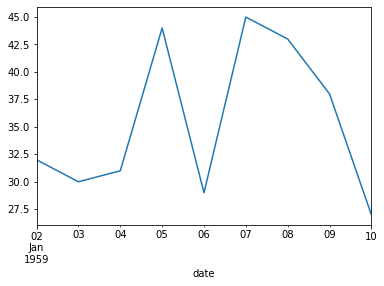

In [121]:
dataviz_df2['births'].plot()

In [122]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

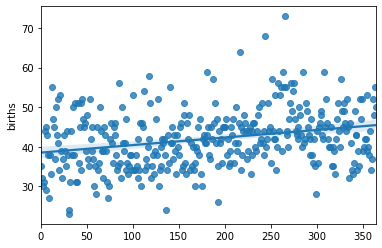

In [123]:
sns.regplot(x=df2.index.values,y=df2['births'])

<AxesSubplot:ylabel='births'>

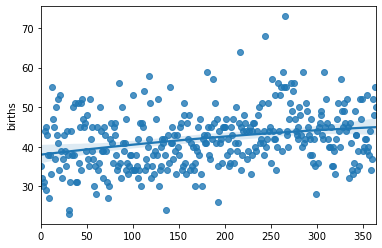

In [124]:
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [125]:
miles_df = pd.read_csv("./us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [126]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:ylabel='MilesMM'>

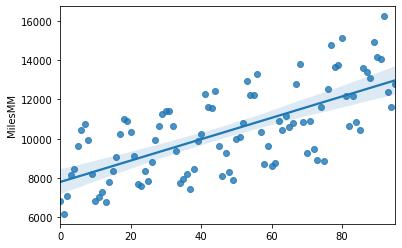

In [127]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

<AxesSubplot:>

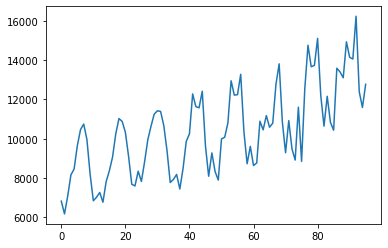

In [128]:
miles_df['MilesMM'].plot()

In [129]:
miles_df['year'] = miles_df['Month'].dt.year

In [130]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [131]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

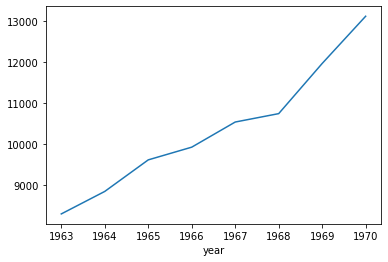

In [132]:
miles_df.groupby('year')['MilesMM'].mean().plot()

In [133]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [134]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

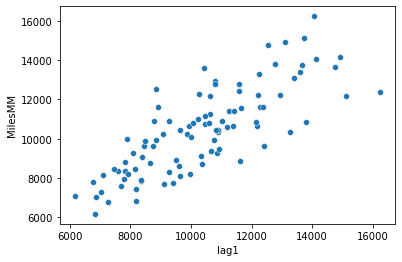

In [135]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

In [136]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

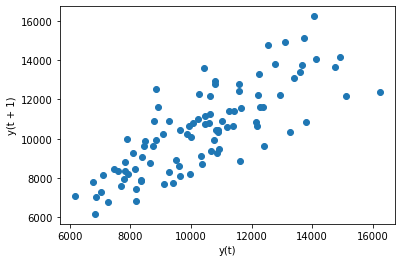

In [137]:
lag_plot(miles_df['MilesMM'])

In [138]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

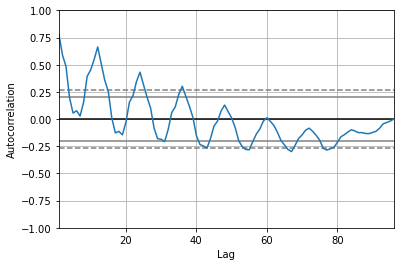

In [139]:
autocorrelation_plot(miles_df['MilesMM'])

# Feature Engineering

In [140]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [141]:
features = df2.copy()

In [142]:
features['year'] = df2['date'].dt.year

In [143]:
features['month'] = df2['date'].dt.month

In [144]:
features['day'] = df2['date'].dt.day

In [145]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [146]:
features['lag1']  = df2['births'].shift(1)

In [147]:
features['lag2']  = df2['births'].shift(365)

In [148]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [149]:
features['roll_mean'] = df2['births'].rolling(window=2).mean()

In [150]:
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [151]:
features['roll_max'] = df2['births'].rolling(window=3).max()

In [152]:
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


In [153]:
features['expand_max'] = df2['births'].expanding().max()

In [154]:
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


# Downsampling

In [155]:
miles_df = pd.read_csv("./us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [156]:
quarterly_miles_df = miles_df.resample('Q',on='Month').mean()

In [157]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [158]:
yearly_miles_df = miles_df.resample('A',on='Month').sum()

In [159]:
yearly_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


# Upsampling

In [160]:
upsampled_miles_df = miles_df.resample('D',on='Month').mean()

In [161]:
upsampled_miles_df.head()

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN


In [162]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [163]:
interpolated_miles_df.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065


<AxesSubplot:xlabel='Month'>

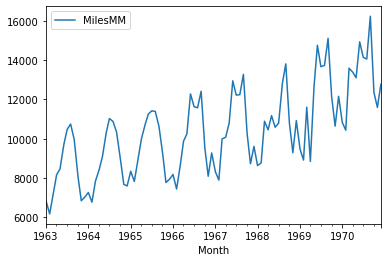

In [164]:
interpolated_miles_df.plot()

In [165]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline',order=2)

<AxesSubplot:xlabel='Month'>

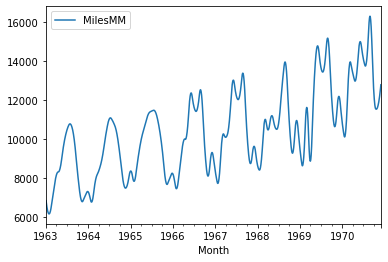

In [166]:
poly_interpolated_miles_df.plot()

# Decomposing Time Series

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [168]:
miles_decomp_df = pd.read_csv("./us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [169]:
miles_decomp_df.index = miles_decomp_df['Month']

In [170]:
result = seasonal_decompose(miles_decomp_df['MilesMM'],model='additive')

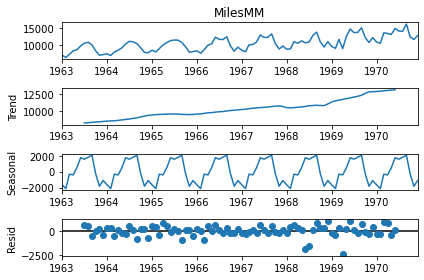

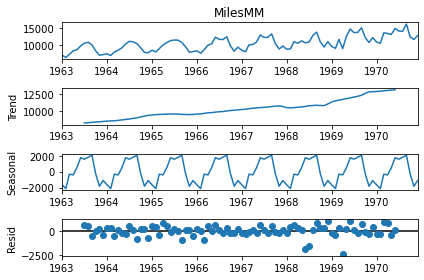

In [171]:
result.plot()

In [172]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'],model='multiplicative')

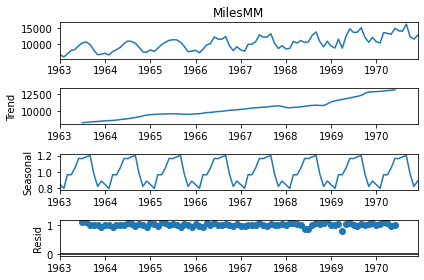

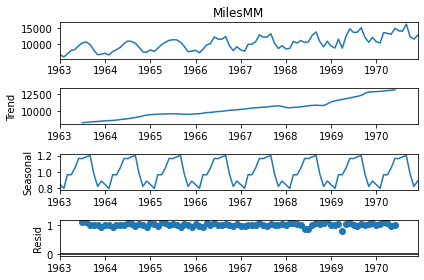

In [173]:
result2.plot()

# Differencing

In [174]:
miles_df = pd.read_csv("./us-airlines-monthly-aircraft-miles-flown.csv",header=0,parse_dates=[0])

In [175]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [176]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [177]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


In [178]:
miles_df.index = miles_df['Month']

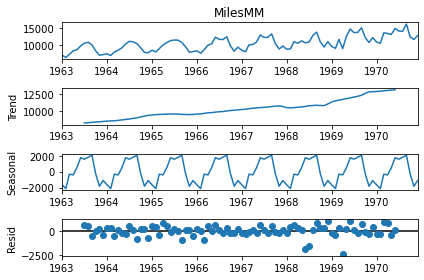

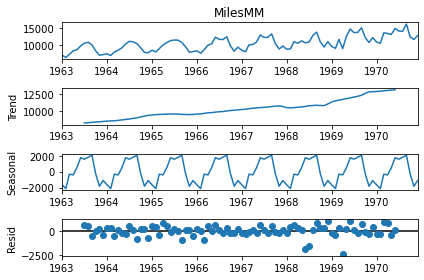

In [179]:
result_a = seasonal_decompose(miles_df['MilesMM'],model='additive')
result_a.plot()

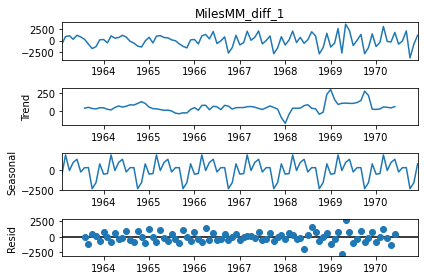

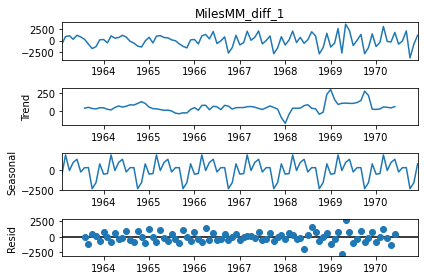

In [180]:
result_a = seasonal_decompose(miles_df.iloc[1:,3],model='additive')
result_a.plot()

<AxesSubplot:xlabel='Month'>

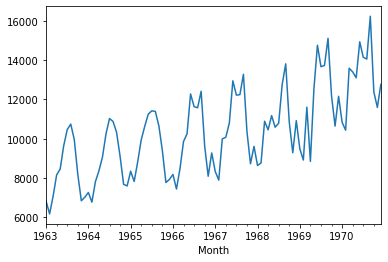

In [181]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

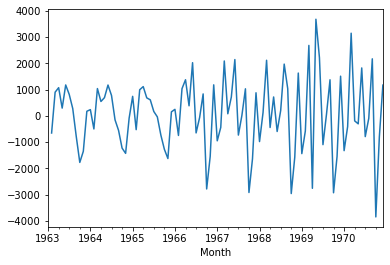

In [182]:
miles_df['MilesMM_diff_1'].plot()

In [183]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

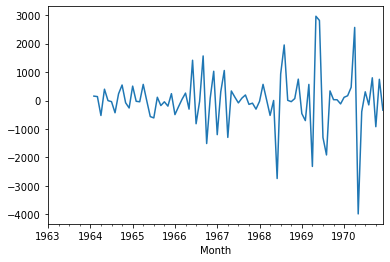

In [184]:
miles_df['MilesMM_diff_12'].plot()

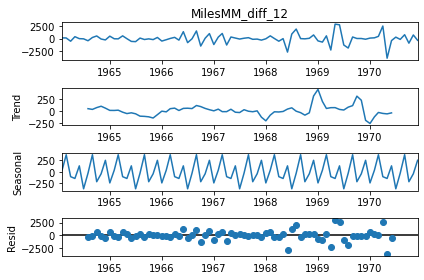

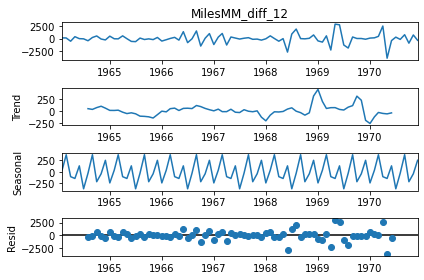

In [185]:
result_b = seasonal_decompose(miles_df.iloc[13:,4],model='additive')
result_b.plot()

#miles_df.head(35)

# Test train split

In [186]:
temp_df = pd.read_csv('./daily-min-temperatures.csv',header=0,parse_dates=[0])

In [187]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [188]:
temp_df.shape[0]

3650

In [189]:
train_size = int(temp_df.shape[0]*.8)
train_size

2920

In [190]:
train = temp_df[0:train_size]

In [191]:
test = temp_df[train_size:]

In [192]:
train.shape

(2920, 2)

In [193]:
test.shape

(730, 2)

# Persistance Model

In [194]:
df = pd.read_csv('./daily-min-temperatures.csv',header=0,parse_dates=[0])

In [195]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [196]:
df['t'] = df['Temp'].shift(1)

In [197]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [198]:
train, test = df[1 : int(df.shape[0] -7)], df[int(df.shape[0]-7):]

In [199]:
train.shape

(3642, 3)

In [200]:
test.shape

(7, 3)

In [201]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [202]:
train_x , train_y = train['t'], train['Temp']
test_x , test_y = test['t'], test['Temp']

In [203]:
predictions = test_x.copy()

In [204]:
from sklearn.metrics import mean_squared_error

In [205]:
mse = mean_squared_error(test_y,predictions)
mse

3.4228571428571413

In [206]:
from matplotlib import pyplot

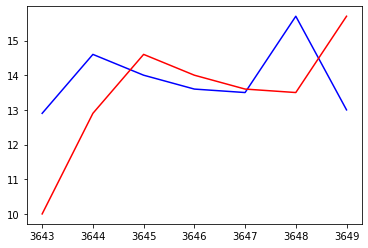

In [207]:
pyplot.plot(test_y,color='blue')
pyplot.plot(predictions,color='red')

# Autoregresion Model

In [237]:
df = pd.read_csv('./daily-min-temperatures.csv',header=0,parse_dates=[0])

In [240]:
train, test = df.Temp[1 : int(df.shape[0] -7)], df.Temp[int(df.shape[0]-7):]

In [241]:
from statsmodels.tsa.ar_model  import AR

In [242]:
model = AR(train)
model_fit = model.fit()

In [243]:
model_fit.k_ar

29

### Cost of lag variables

In [244]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [245]:
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [246]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [247]:
mse = mean_squared_error(test_y,predictions)

In [248]:
mse

1.5015252310069906

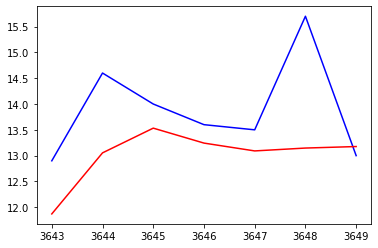

In [249]:
pyplot.plot(test_y,color='blue')
pyplot.plot(predictions,color='red')

### Walk Forward

In [251]:
import numpy as np

In [252]:
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data),end=len(train)+len(test)-1)
    predict.append(y.values[0])
    data = np.append(data,t)
    data = pd.Series(data)

In [253]:
predict

[11.87127484772783,
 13.660699943835189,
 14.353164144090165,
 13.430120791627024,
 13.374756477185109,
 13.479111299420527,
 14.767773018439886]

In [255]:
mse = mean_squared_error(test.values,predict)
mse

1.4524568425185298

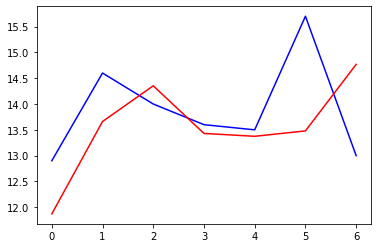

In [257]:
pyplot.plot(test.values,color='blue')
pyplot.plot(predict,color='red')

### Moving Average Model

In [258]:
df['t'] = df['Temp'].shift(1)

In [260]:
df['Resid'] = df['Temp']  - df['t']

In [261]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [277]:
train, test = df.Resid[1 : int(df.shape[0] -7)], df.Resid[int(df.shape[0]-7):]

In [278]:
model  = AR(train)
model_fit = model.fit()

C:\Users\Marcelo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [264]:
model_fit.k_ar

29

In [265]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [279]:
pred_resid = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [280]:
predictions = df.t[df.shape[0]-7] + pred_resid

In [281]:
predictions

3643    12.004986
3644    11.264192
3645    10.510869
3646     9.748313
3647     9.877946
3648    10.077509
3649    10.055600
dtype: float64

In [282]:
mse = mean_squared_error(test_y,predictions)

In [283]:
mse

13.191336612905122

In [ ]:
pyplot.plot(test.values,color='blue')
pyplot.plot(predict,color='red')

# ARIMA Model

In [2]:
df = pd.read_csv('./shampoo.csv',header=0,parse_dates=[0])

<AxesSubplot:>

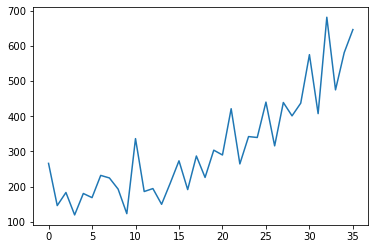

In [3]:
df['Sales'].plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

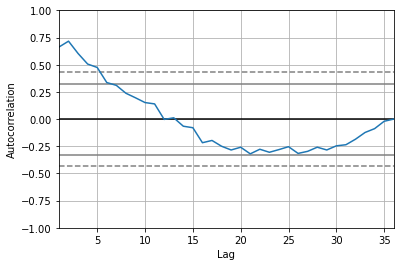

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

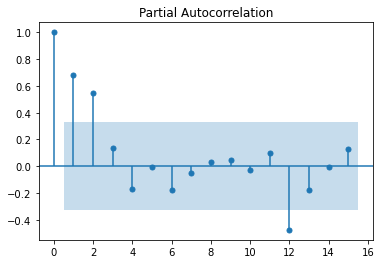

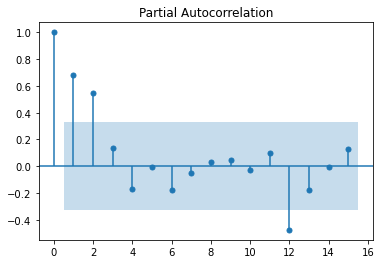

In [6]:
plot_pacf(df['Sales'],lags=15)

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
model = ARIMA(df['Sales'],order= (2,2,5))

C:\Users\Marcelo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
model_fit = model.fit()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.